In [1]:
import pandas as pd
from pandas import Series, DataFrame


In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head() #getting a preview of the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info() #prints out information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Question 1: Who were the passengers on the titanic?

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

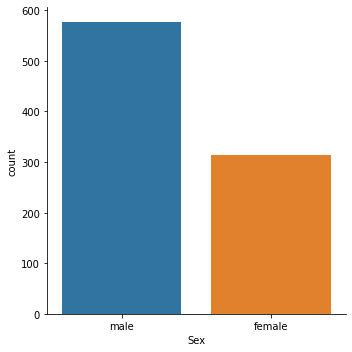

In [29]:
#Checking the gender of passengers
sns.catplot(x="Sex",kind="count",data=titanic_df) #catplot in place of factorplot

There were relatively more males on the ship than females

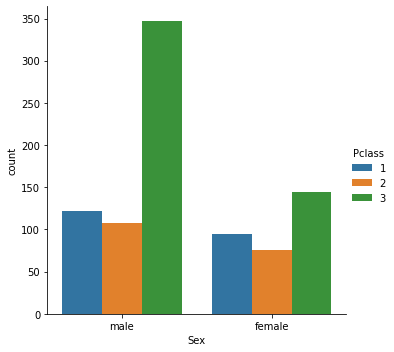

In [30]:
#separating gender by classes
sns.catplot(x="Sex",kind="count",data=titanic_df,hue="Pclass")

There's a similar trend in the number of passengers in the various classes between both genders. Overall, the 3rd class had the most passengers, followed by the 1st class and then the 2nd class. Comparatively, the men always outnumbered the women in all classes. 

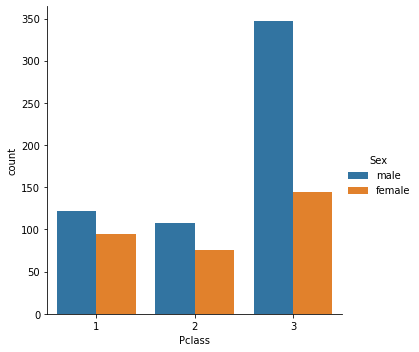

In [31]:
sns.catplot(x="Pclass",kind="count",data=titanic_df,hue="Sex")

Class 3 being the cheapest option also had the most passengers, having way more males than females.

A category of people that are neglected with our binary classification are the children.
Using the applied technique, we can create a function to classify passengers as either men, women, and children. 

In [32]:
def male_female_child(passenger):
    age,sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [33]:

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1) #takes in the age, and sex of a passenger, applies the function above and returns the output to the new column created titled person

In [34]:
titanic_df[0:10] #taking a look at the newly created column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


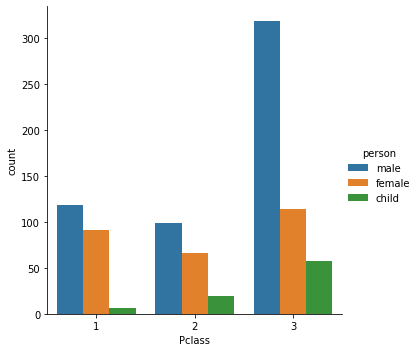

In [35]:
sns.catplot(x='Pclass',kind="count",data=titanic_df,hue="person")

There are more children in the 3rd class compared to the first class.

To get a more precise picture, lets create a distribution of the ages.

<AxesSubplot:>

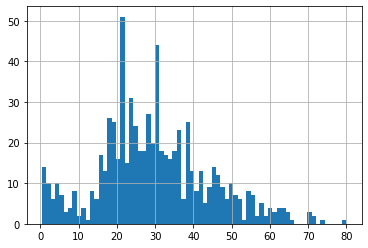

In [37]:
#creating a histogram
titanic_df['Age'].hist(bins=70)

There's a more normal distribution of ages after 10 years.

In [38]:
#getting the mean age of passengers
titanic_df['Age'].mean()

29.69911764705882

In [39]:

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64